<a href="https://colab.research.google.com/github/StevenTannn/Compfest-DS-Covid/blob/spt/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [2]:
data_filename = "Daily Update Data Agregat Covid-19 Jakarta.xlsx"

In [3]:
dataset = []

In [4]:
for i in range (0,10): 
    sheet = pd.read_excel(data_filename,sheet_name=i,engine="openpyxl")
    dataset.append(sheet)

# Dataset variable information 
- **DJ** = Data Jakarta (DONE)
- **DIJ** = Data Indonesia and Jakarta (DONE)
- **Suspek** = Data Suspek (DONE)
- **RDT ab** = Data  RDT ab (DONE)
- **RDT ag** = Data RDT ag (DONE)
- **HL** = Data Hasil Lab (NOT USE)
- **V** = Data vaksinasi
- **P** = Data pemakaman
- **VW** = Data vaksinasi wilayah (DONE)
- **DVWI** = Daily vaksinasi wilayah (DONE)

In [5]:
df_DJ = dataset[0]
df_DIJ = dataset[1]
df_Suspek = dataset[2]
df_RDTab = dataset[3]
df_RDTag = dataset[4]
df_HL = dataset[5]
df_V = dataset[6]
df_P = dataset[7]
df_VW = dataset[8]
df_DVW = dataset[9]

In [6]:
idx = 0 
for i in dataset : 
    print(f"dataset ke dari excel {idx}: ")
    print(i.info())
    print()
    idx+=1

dataset ke dari excel 0: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Tanggal                             503 non-null    datetime64[ns]
 1   Jam                                 484 non-null    float64       
 2   Tanggal Jam                         503 non-null    datetime64[ns]
 3   Total Pasien                        503 non-null    int64         
 4   Sembuh                              503 non-null    int64         
 5   Meninggal                           503 non-null    int64         
 6   Self Isolation                      503 non-null    int64         
 7   Masih Perawatan                     503 non-null    int64         
 8   Belum Diketahui (masih verifikasi)  0 non-null      float64       
 9   Menunggu Hasil                      6 non-null      float64       
 10  

### Cleaning and re-arange Vaksin dataset

In [7]:
df_V.columns = df_V.iloc[1] + " | " + df_V.iloc[2] + " | " + df_V.iloc[3]

In [8]:
df_V.drop([0,1,2,3],axis=0,inplace=True)

In [9]:
df_V.rename(columns={df_V.columns[0] : "Tanggal"},inplace=True)

In [10]:
df_V.head()

,Tanggal,DKI | Tenaga Kesehatan | Target Vaksinasi,DKI | Tenaga Kesehatan | Vaksinasi 1,DKI | Tenaga Kesehatan | Vaksinasi 2,DKI | Tenaga Kesehatan | Persentase 1,DKI | Tenaga Kesehatan | Persentase 2,DKI | Lansia | Target Vaksinasi,DKI | Lansia | Vaksinasi 1,DKI | Lansia | Vaksinasi 2,DKI | Lansia | Persentase 1,DKI | Lansia | Persentase 2,DKI | Pelayan Publik | Target Vaksinasi,DKI | Pelayan Publik | Vaksinasi 1,DKI | Pelayan Publik | Vaksinasi 2,DKI | Pelayan Publik | Persentase 1,DKI | Pelayan Publik | Persentase 2,DKI | Total DKI Jakarta | Target Vaksinasi,DKI | Total DKI Jakarta | Vaksinasi 1,DKI | Total DKI Jakarta | Vaksinasi 2,DKI | Total DKI Jakarta | Persentase 1,DKI | Total DKI Jakarta | Persentase 2,DKI | Vaksinasi Harian | Vaksinasi 1,Tanggal,DKI | Total 18 - 59 Tahun DKI Jakarta | Target Vaksinasi,DKI | Total 18 - 59 Tahun DKI Jakarta | Vaksinasi 1,DKI | Total 18 - 59 Tahun DKI Jakarta | Vaksinasi 2,DKI | Total 18 - 59 Tahun DKI Jakarta | Persentase 1,DKI | Total 18 - 59 Tahun DKI Jakarta | Persentase 2,DKI | Total 12 - 17 Tahun DKI Jakarta | Target Vaksinasi,DKI | Total 12 - 17 Tahun DKI Jakarta | Vaksinasi 1,DKI | Total 12 - 17 Tahun DKI Jakarta | Vaksinasi 2,DKI | Total 12 - 17 Tahun DKI Jakarta | Persentase 1,DKI | Total 12 - 17 Tahun DKI Jakarta | Persentase 2,DKI | Tenaga Kesehatan | Target Vaksinasi,DKI | Tenaga Kesehatan | Vaksinasi 1,DKI | Tenaga Kesehatan | Vaksinasi 2,DKI | Tenaga Kesehatan | Persentase 1,DKI | Tenaga Kesehatan | Persentase 2,DKI | Lansia | Target Vaksinasi,DKI | Lansia | Vaksinasi 1,DKI | Lansia | Vaksinasi 2,DKI | Lansia | Persentase 1,DKI | Lansia | Persentase 2,DKI | Pelayan Publik | Target Vaksinasi,DKI | Pelayan Publik | Vaksinasi 1,DKI | Pelayan Publik | Vaksinasi 2,DKI | Pelayan Publik | Persentase 1,DKI | Pelayan Publik | Persentase 2,DKI | Total Indonesia | Target Vaksinasi,DKI | Total Indonesia | Vaksinasi 1,DKI | Total Indonesia | Vaksinasi 2,DKI | Total Indonesia | Persentase 1,DKI | Total Indonesia | Persentase 2,DKI | Vaksinasi Harian | Vaksinasi 1,Tanggal,DKI | Total 18 - 59 Tahun Indonesia | Target Vaksinasi,DKI | Total 18 - 59 Tahun Indonesia | Vaksinasi 1,DKI | Total 18 - 59 Tahun Indonesia | Vaksinasi 2,DKI | Total 18 - 59 Tahun Indonesia | Persentase 1,DKI | Total 18 - 59 Tahun Indonesia | Persentase 2,DKI | Total 12 - 17 Tahun Indonesia | Target Vaksinasi,DKI | Total 12 - 17 Tahun Indonesia | Vaksinasi 1,DKI | Total 12 - 17 Tahun Indonesia | Vaksinasi 2,DKI | Total 12 - 17 Tahun Indonesia | Persentase 1,DKI | Total 12 - 17 Tahun Indonesia | Persentase 2,Tanggal,Tanggal,Vaksin Gotong Royong | Jakarta | Vaksinasi 1,Vaksin Gotong Royong | Jakarta | Vaksinasi 2,Vaksin Gotong Royong | Indonesia | Vaksinasi 1,Vaksin Gotong Royong | Indonesia | Vaksinasi 2,Tanggal,Tanggal
4,2021-03-05 00:00:00,112301,141425,91078,1.25934,0.811017,911631,76451,0,0.0838618,0,1976757,64121,0,0.0324375,0,3000689,281997,91078,0.0939774,0.0303524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1468764,1692016,1111938,1.152,0.757057,21553118,179711,2,0.00833805,9.2794e-08,17327169,541888,2597,0.0312739,0.00014988,40349051,2413615,1114537,0.0598184,0.0276224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
5,2021-03-06 00:00:00,112301,144046,91379,1.28268,0.813697,911631,79421,0,0.0871197,0,1976757,66484,0,0.0336329,0,3000689,289951,91379,0.0966281,0.0304527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1468764,1741784,1126353,1.18588,0.766871,21553118,206025,2,0.00955894,9.2794e-08,17327169,604456,4169,0.0348849,0.000240605,40349051,2552265,1130524,0.0632546,0.0280186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
6,2021-03-07 00:00:00,112301,177126,91460,1.57724,0.814418,911631,83628,0,0.0917345,0,1976757,73752,2514,0.0373096,0.00127178,3000689,334506,93974,0.111476,0.0313175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1468764,2049651,1129340,1.39549,0.768905,21553118,215632,2,0.0100047,9.2794e-08,17327169,623474,4445,0.0359825,0.000256534

In [11]:
idx = 0 
for i in dataset : 
    i.dropna(axis=1, how='all',inplace=True)
    print(f"dataset ke dari excel {idx}: ")
    print(i.info())
    idx+=1

dataset ke dari excel 0: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Tanggal                      503 non-null    datetime64[ns]
 1   Jam                          484 non-null    float64       
 2   Tanggal Jam                  503 non-null    datetime64[ns]
 3   Total Pasien                 503 non-null    int64         
 4   Sembuh                       503 non-null    int64         
 5   Meninggal                    503 non-null    int64         
 6   Self Isolation               503 non-null    int64         
 7   Masih Perawatan              503 non-null    int64         
 8   Menunggu Hasil               6 non-null      float64       
 9   Tenaga Kesehatan Terinfeksi  6 non-null      float64       
 10  Positif Harian               503 non-null    int64         
 11  Positif Aktif      

In [12]:
df_RDTag = df_RDTag.rename(columns={"Tgl": "Tanggal"})

In [13]:
df_RDTab = df_RDTab.drop(['catatan:'], axis=1)

### Data Jakarta

In [14]:
df_DJ.head()

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,NaN,2020-03-01 18:00:00,0,0,0,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN
1,2020-03-02,NaN,2020-03-02 18:00:00,0,0,0,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN
2,2020-03-03,NaN,2020-03-03 18:00:00,3,0,1,0,2,NaN,NaN,3,2,0,NaN,NaN,NaN
3,2020-03-04,NaN,2020-03-04 18:00:00,3,0,1,0,2,NaN,NaN,0,2,0,NaN,NaN,NaN
4,2020-03-05,NaN,2020-03-05 18:00:00,7,0,3,0,4,NaN,NaN,4,4,0,NaN,NaN,NaN


In [15]:
df_DJ.tail()

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
498,2021-07-12,8.0,2021-07-12 08:00:00,677061,584912,9462,66581,16106,NaN,NaN,14619,82687,20475,17649.0,25597.0,39441.0
499,2021-07-13,8.0,2021-07-13 08:00:00,689243,589486,9541,71848,18368,NaN,NaN,12182,90216,4574,16957.0,22339.0,50920.0
500,2021-07-14,8.0,2021-07-14 08:00:00,701910,592556,9603,78571,21180,NaN,NaN,12667,99751,3070,32752.0,54463.0,12536.0
501,2021-07-15,8.0,2021-07-15 08:00:00,714601,595582,9743,86298,22978,NaN,NaN,12691,109276,3026,31922.0,52360.0,24994.0
502,2021-07-16,8.0,2021-07-16 08:00:00,727016,604034,9845,88294,24843,NaN,NaN,12415,113137,8452,28216.0,48144.0,36777.0


In [16]:
df_DJ['Positif Harian'].describe()

count      503.000000
mean      1445.359841
std       2245.317226
min          0.000000
25%        219.000000
50%        890.000000
75%       1447.500000
max      14619.000000
Name: Positif Harian, dtype: float64

In [17]:
df_DJ['Positif Harian'].median()

890.0

In [18]:
df_DJ['Positif Harian'].mode()

0    0
dtype: int64

([<matplotlib.axis.YTick at 0x7f1e6cbb26d0>], [Text(0, 0, 'Positif Harian')])

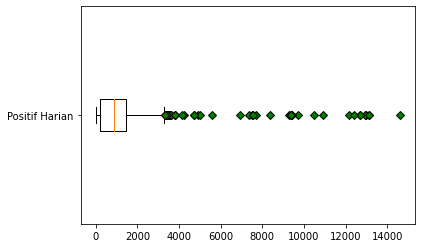

In [19]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(df_DJ['Positif Harian'],flierprops=green_diamond,vert=False)
plt.yticks([1], ['Positif Harian'])

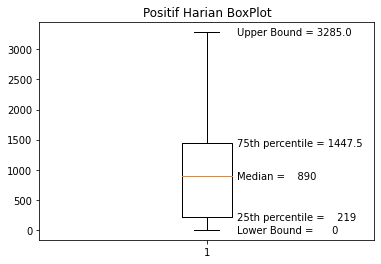

In [20]:
def make_labels(ax, boxplot):

    # Grab the relevant Line2D instances from the boxplot dictionary
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]

    # The x position of the median line
    xpos = med.get_xdata()

    # Lets make the text have a horizontal offset which is some 
    # fraction of the width of the box
    xoff = 0.10 * (xpos[1] - xpos[0])

    # The x position of the labels
    xlabel = xpos[1] + xoff

    # The median is the y-position of the median line
    median = med.get_ydata()[1]

    # The 25th and 75th percentiles are found from the
    # top and bottom (max and min) of the box
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

    # The caps give the vertical position of the ends of the whiskers
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

    # Make some labels on the figure using the values derived above
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median), va='center')
    ax.text(xlabel, pc25,
            '25th percentile = {:6.3g}'.format(pc25), va='center')
    ax.text(xlabel, pc75,
            '75th percentile = {:6}'.format(pc75), va='center')
    ax.text(xlabel, capbottom,
            'Lower Bound = {:6.3g}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Upper Bound = {:6}'.format(captop), va='center')

# Make the figure
red_diamond = dict(markerfacecolor='r', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Positif Harian BoxPlot')

# Create the boxplot and store the resulting python dictionary
my_boxes = ax3.boxplot(df_DJ['Positif Harian'], showfliers=False)

# Call the function to make labels
make_labels(ax3, my_boxes)

plt.show()

In [21]:
df_DJ['Positif Harian'] = sorted(df_DJ['Positif Harian'])
q1, q3= np.percentile(df_DJ['Positif Harian'],[25,75])
iqr=q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print("Jumlah Outlier",df_DJ["Positif Harian"][(df_DJ["Positif Harian"] < lower_bound) | (df_DJ["Positif Harian"] > upper_bound)].count())


Jumlah Outlier 47


In [22]:
df_RD = df_RDTab.merge(df_RDTag, how='inner', on='Tanggal')

In [23]:
df_Coor = df_RD.merge(df_DJ, how='inner', on='Tanggal')

In [24]:
df_Coor.dropna(axis=1, how='all',inplace=True)

In [25]:
df_Coor.columns

Index(['No.', 'Tanggal', 'Reaktif', 'Non-Reaktif', 'Total', 'Positivity Rate',
       'No ', 'EIS Positif', 'EIS Negatif', 'EIS Total', 'NAR Positivity Rate',
       'NAR Positif', 'NAR Negatif', 'NAR Total', 'Excel Positivity Rate',
       'Excel Positif', 'Excel Negatif', 'Excel Total',
       'Excel Positivity Rate.1', 'TotalDKI Tes Harian',
       'TotalDKI Positif  Harian', 'TotalDKI Negatif Harian',
       'TotalDKI Positivity Rate Harian', 'Total Kumulatif',
       'Positif Kumulatif', 'Negatif Kumulatif', 'Positivity Rate Kumulatif',
       'Jam', 'Tanggal Jam', 'Total Pasien', 'Sembuh', 'Meninggal',
       'Self Isolation', 'Masih Perawatan', 'Positif Harian', 'Positif Aktif',
       'Sembuh Harian', 'Tanpa Gejala', 'Bergejala', 'Belum Ada Data'],
      dtype='object')

In [26]:
corr = df_Coor.corr()

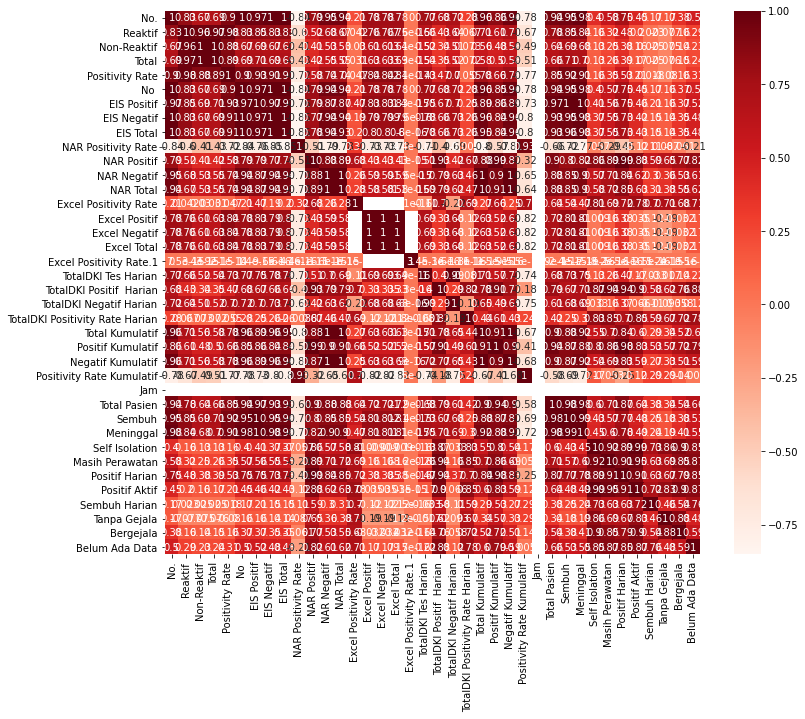

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
cor_target = abs(corr["Positif Harian"])
relevant_features = cor_target[cor_target>0.95]
relevant_features

NAR Positif          0.994080
Positif Kumulatif    0.980707
Positif Harian       1.000000
Name: Positif Harian, dtype: float64

In [29]:
print(df_Coor[["NAR Positif","Positif Kumulatif"]].corr())
print("")

                   NAR Positif  Positif Kumulatif
NAR Positif           1.000000           0.992677
Positif Kumulatif     0.992677           1.000000



#### Korelasi yang diambil NAR POSITIF TERHADAP POSITIF HARIAN --> KORELASINYA MAKIN TINGGINYA ANGKA TEST ANTIGEN MAKA MAKIN TINGGI KASUS POSITIF YANG TERJADI

In [30]:
df_VW.columns = df_VW.iloc[0]

In [31]:
df_VW = df_VW.drop([0])
df_VW = df_VW.dropna(how='all')

In [32]:
df_DVW = df_DVW.drop(['Unnamed: 3', 'Keterangan'], axis=1)

In [33]:
df_VW = df_VW.groupby(df_VW.columns, axis=1).sum()

In [34]:
df_VW = df_VW[df_VW.columns.drop(list(df_VW.filter(regex='Keterangan')))]

In [35]:
df_VW['Cakupan Suntik 1'] = df_VW.iloc[:, :10].sum(axis=1)

In [36]:
df_VW.columns

Index(['Cakupan Suntik 1', 'Cakupan Suntik 1 - Cakupan 12 Juni',
       'Cakupan Suntik 1 - Cakupan 13 Jan - 11 Juni',
       'Cakupan Suntik 1 - Cakupan 13 Juni',
       'Cakupan Suntik 1 - Cakupan 14 Juni',
       'Cakupan Suntik 1 - Cakupan 15 Juni',
       'Cakupan Suntik 1 - Cakupan 16 Juni',
       'Cakupan Suntik 1 - Cakupan 17 Juni',
       'Cakupan Suntik 1 - Cakupan 19 Juni',
       'Cakupan Suntik 1- Cakupan 18 Juni', 'Cakupan Suntik 2',
       'Cakupan Suntik 2 - Cakupan 12 Juni',
       'Cakupan Suntik 2 - Cakupan 13 Jan - 11 Juni',
       'Cakupan Suntik 2 - Cakupan 13 Juni',
       'Cakupan Suntik 2 - Cakupan 14 Juni',
       'Cakupan Suntik 2 - Cakupan 15 Juni',
       'Cakupan Suntik 2 - Cakupan 16 Juni',
       'Cakupan Suntik 2 - Cakupan 17 Juni',
       'Cakupan Suntik 2 - Cakupan 18 Juni',
       'Cakupan Suntik 2 - Cakupan 19 Juni', 'Kecamatan', 'Kota / Kabupaten',
       'No.', 'Target Harian per Kecamatan', 'Target Total per Kecamatan'],
      dtype='object', na

In [37]:
df_VW['Cakupan Suntik 2'] = df_VW.iloc[:, 10:-4].sum(axis=1)

In [38]:
df_VW_group = df_VW.groupby(['Kota / Kabupaten']).sum().reset_index().iloc[:,[0,1,11]]

In [39]:
df_VW_group

,Kota / Kabupaten,Cakupan Suntik 1,Cakupan Suntik 2
0,Jakarta Barat,975778.0,385686.814
1,Jakarta Pusat,1476141.0,477983.600
2,Jakarta Selatan,1382573.0,546403.582
3,Jakarta Timur,1162998.0,382954.557
4,Jakarta Utara,970981.0,253114.448
5,Kepulauan Seribu,17488.0,6279.022


In [40]:
path = './gadm36_IDN_2.shp'
df_geo = gpd.read_file(path)
display(df_geo)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,None,Kabupaten,Regency,1107,ID.AC.AB,"POLYGON ((96.13205 4.13408, 96.13216 4.13404, ..."
1,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.1_1,Aceh Barat Daya,None,None,Kabupaten,Regency,1112,ID.AC.AD,"MULTIPOLYGON (((96.80518 3.72169, 96.80582 3.7..."
2,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.3_1,Aceh Besar,None,None,Kabupaten,Regency,1108,ID.AC.AR,"MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2..."
3,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.4_1,Aceh Jaya,None,None,Kabupaten,Regency,1116,ID.AC.AJ,"MULTIPOLYGON (((95.87688 4.36750, 95.87684 4.3..."
4,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.5_1,Aceh Selatan,None,None,Kabupaten,Regency,1103,ID.AC.AS,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.1_1,Bantul,None,None,Kabupaten,Regency,3402,ID.YO.BA,"POLYGON ((110.32923 -8.00613, 110.32927 -8.006..."
498,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.2_1,Gunung Kidul,None,None,Kabupaten,Regency,3403,ID.YO.GK,"MULTIPOLYGON (((110.66244 -8.17778, 110.66234 ..."
499,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.3_1,Kota Yogyakarta,None,None,Kota,City,3471,ID.YO.YO,"POLYGON ((110.40143 -7.81923, 110.40170 -7.819..."
500,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.4_1,Kulon Progo,None,None,Kabupaten,Regency,3401,ID.YO.KP,"POLYGON ((110.20530 -7.98388, 110.20493 -7.984..."


In [41]:
df_geo = df_geo.loc[df_geo['NAME_2'].str.contains(r'(Jakarta|Kepulauan Seribu)')]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


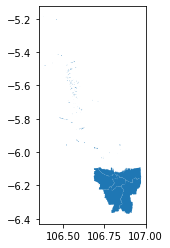

In [42]:
df_geo.plot()

In [43]:
df_geo_join = df_geo.merge(df_VW_group, how='inner', left_on="NAME_2", right_on="Kota / Kabupaten")
df_geo_join = df_geo_join[['Kota / Kabupaten','Cakupan Suntik 1','Cakupan Suntik 2','geometry']]

In [44]:
df_geo_join

,Kota / Kabupaten,Cakupan Suntik 1,Cakupan Suntik 2,geometry
0,Jakarta Barat,975778.0,385686.814,"POLYGON ((106.80800 -6.16138, 106.80761 -6.161..."
1,Jakarta Pusat,1476141.0,477983.600,"POLYGON ((106.84905 -6.20754, 106.84895 -6.207..."
2,Jakarta Selatan,1382573.0,546403.582,"POLYGON ((106.79466 -6.36492, 106.79464 -6.364..."
3,Jakarta Timur,1162998.0,382954.557,"POLYGON ((106.88349 -6.37023, 106.88338 -6.370..."
4,Jakarta Utara,970981.0,253114.448,"POLYGON ((106.78062 -6.14381, 106.78053 -6.143..."
5,Kepulauan Seribu,17488.0,6279.022,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ..."


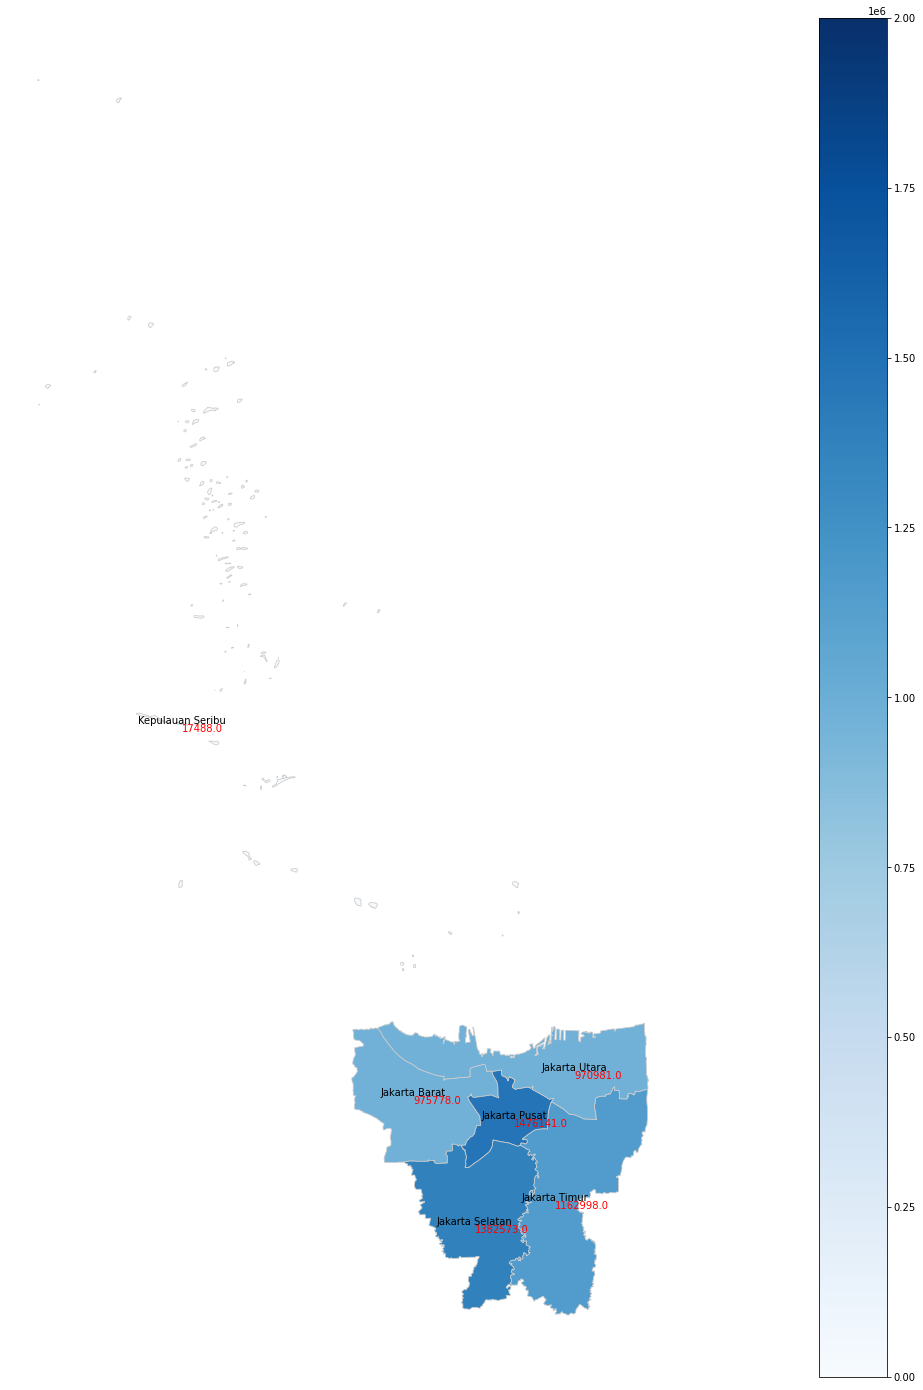

In [45]:
values = 'Cakupan Suntik 1'
vmin, vmax = 0,2000000
fig, ax = plt.subplots(1, figsize=(50, 25))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)
df_geo_join['coords'] = df_geo_join['geometry'].apply(lambda x: x.representative_point().coords[:])
df_geo_join['coords'] = [coords[0] for coords in df_geo_join['coords']]
df_geo_join.plot(column=values, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))
for idx, row in df_geo_join.iterrows():
    plt.annotate(s=row['Kota / Kabupaten'], xy=row['coords'],
                 horizontalalignment='center')
    plt.annotate(s=row['Cakupan Suntik 1'], xy=row['coords'],
                 verticalalignment='top',color='red')

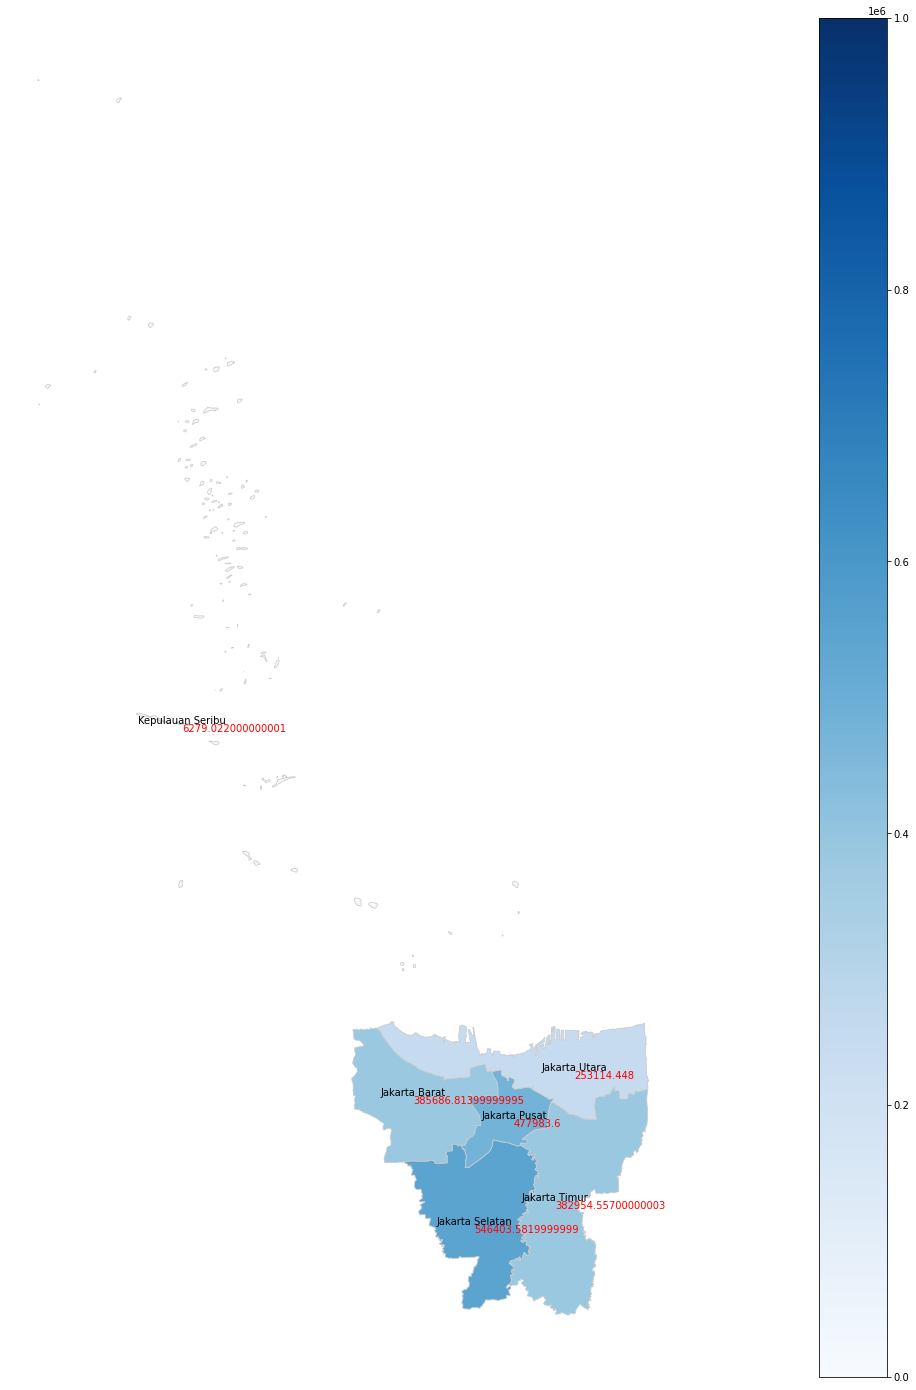

In [46]:
values = 'Cakupan Suntik 2'
vmin, vmax = 0,1000000
fig, ax = plt.subplots(1, figsize=(50, 25))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)
df_geo_join['coords'] = df_geo_join['geometry'].apply(lambda x: x.representative_point().coords[:])
df_geo_join['coords'] = [coords[0] for coords in df_geo_join['coords']]
df_geo_join.plot(column=values, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))
for idx, row in df_geo_join.iterrows():
    plt.annotate(s=row['Kota / Kabupaten'], xy=row['coords'],
                 horizontalalignment='center')
    plt.annotate(s=row['Cakupan Suntik 2'], xy=row['coords'],
                 verticalalignment='top',color='red')

In [47]:
df_DJ

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,NaN,2020-03-01 18:00:00,0,0,0,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN
1,2020-03-02,NaN,2020-03-02 18:00:00,0,0,0,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN
2,2020-03-03,NaN,2020-03-03 18:00:00,3,0,1,0,2,NaN,NaN,0,2,0,NaN,NaN,NaN
3,2020-03-04,NaN,2020-03-04 18:00:00,3,0,1,0,2,NaN,NaN,0,2,0,NaN,NaN,NaN
4,2020-03-05,NaN,2020-03-05 18:00:00,7,0,3,0,4,NaN,NaN,0,4,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2021-07-12,8.0,2021-07-12 08:00:00,677061,584912,9462,66581,16106,NaN,NaN,12920,82687,20475,17649.0,25597.0,39441.0
499,2021-07-13,8.0,2021-07-13 08:00:00,689243,589486,9541,71848,18368,NaN,NaN,12974,90216,4574,16957.0,22339.0,50920.0
500,2021-07-14,8.0,2021-07-14 08:00:00,701910,592556,9603,78571,21180,NaN,NaN,13112,99751,3070,32752.0,54463.0,12536.0
501,2021-07-15,8.0,2021-07-15 08:00:00,714601,595582,9743,86298,22978,NaN,NaN,13133,109276,3026,31922.0,52360.0,24994.0


In [48]:
df_DJ_join = df_DJ.merge(df_DIJ,  how='inner', on='Tanggal')
df_DJ_join

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,NaN,2020-03-01 18:00:00,0,0,0,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,NaN,2020-03-02 18:00:00,0,0,0,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,NaN,2020-03-03 18:00:00,3,0,1,0,2,NaN,NaN,0,2,0,NaN,NaN,NaN,0,0,2,2,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,NaN,2020-03-04 18:00:00,3,0,1,0,2,NaN,NaN,0,2,0,NaN,NaN,NaN,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,NaN,2020-03-05 18:00:00,7,0,3,0,4,NaN,NaN,0,4,0,NaN,NaN,NaN,0,0,2,2,3,0,0,4,7,4,0,0,0,0,2,0,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2021-07-12,8.0,2021-07-12 08:00:00,677061,584912,9462,66581,16106,NaN,NaN,12920,82687,20475,17649.0,25597.0,39441.0,67355,2119478,380797,2567630,9462,584912,66581,16106,677061,82687,891,34754,4782,40427,67,20475,-1670,-4253,14619,-5923
499,2021-07-13,8.0,2021-07-13 08:00:00,689243,589486,9541,71848,18368,NaN,NaN,12974,90216,4574,16957.0,22339.0,50920.0,68219,2139601,407709,2615529,9541,589486,71848,18368,689243,90216,864,20123,26912,47899,79,4574,5267,2262,12182,7529
500,2021-07-14,8.0,2021-07-14 08:00:00,701910,592556,9603,78571,21180,NaN,NaN,13112,99751,3070,32752.0,54463.0,12536.0,69210,2157363,443473,2670046,9603,592556,78571,21180,701910,99751,991,17762,35764,54517,62,3070,6723,2812,12667,9535
501,2021-07-15,8.0,2021-07-15 08:00:00,714601,595582,9743,86298,22978,NaN,NaN,13133,109276,3026,31922.0,52360.0,24994.0,70192,2176412,480199,2726803,9743,595582,86298,22978,714601,109276,982,19049,36726,56757,140,3026,7727,1798,12691,9525


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


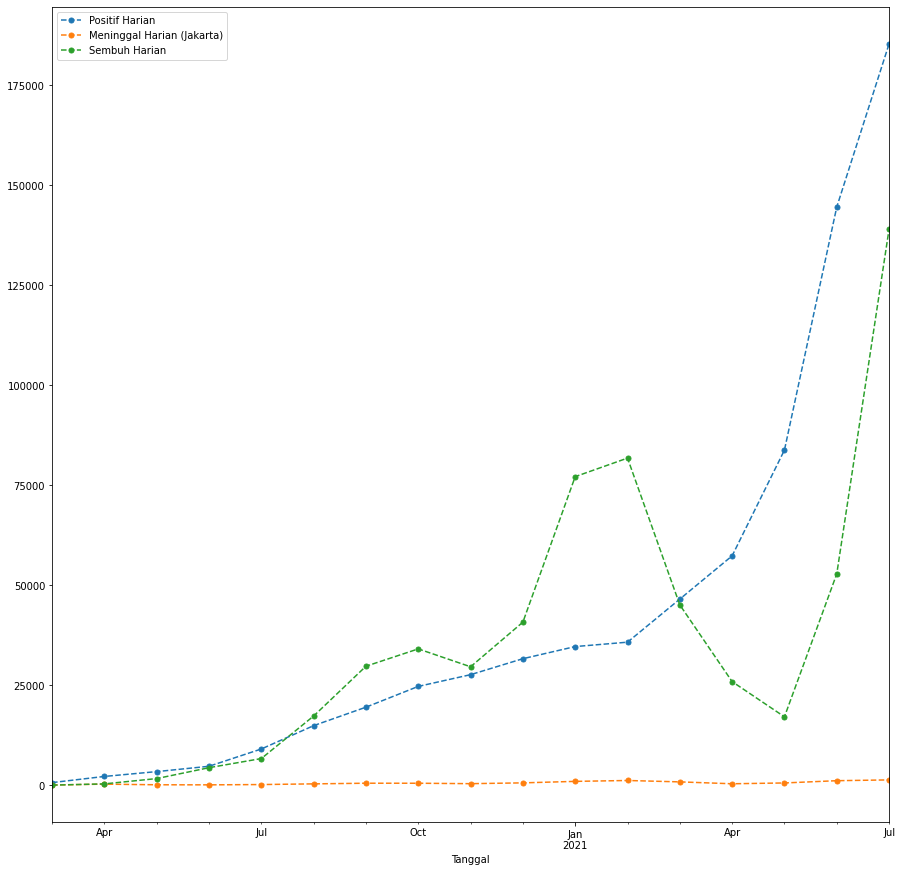

In [49]:
df_DJ_join['Tanggal'] = pd.to_datetime(df_DJ_join['Tanggal'])
df_DJ_join.groupby(df_DJ_join['Tanggal'].dt.to_period('m'))["Positif Harian","Meninggal Harian (Jakarta)","Sembuh Harian"].sum().reset_index().plot(x="Tanggal", y=["Positif Harian","Meninggal Harian (Jakarta)","Sembuh Harian"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='5')
plt.show()

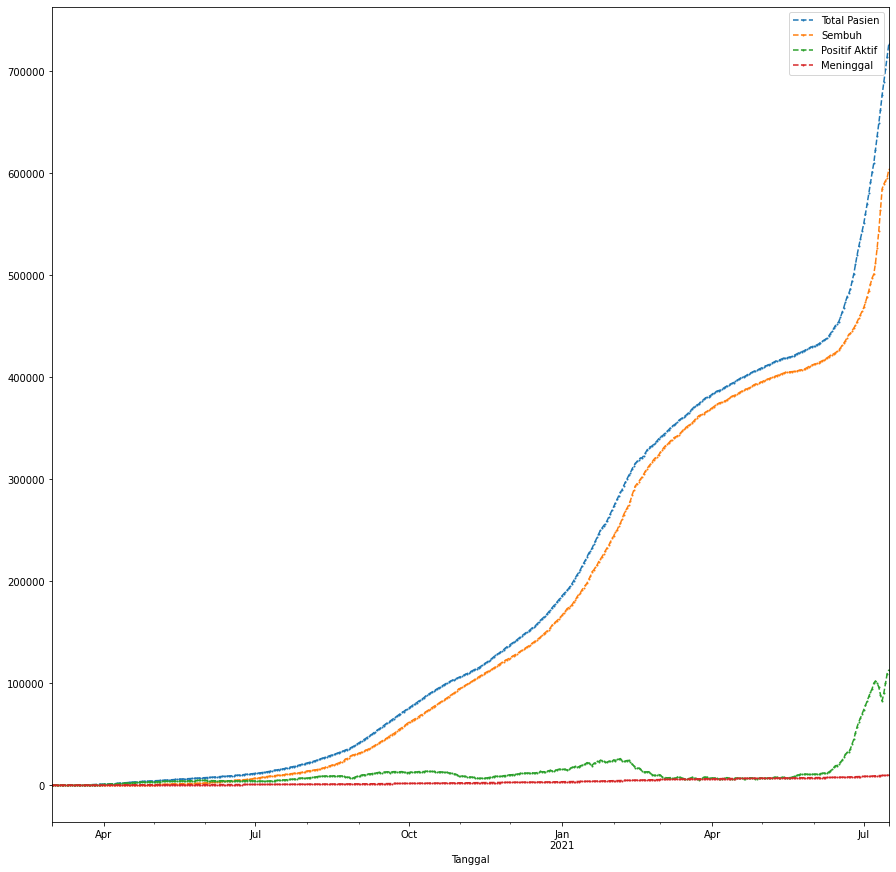

In [50]:
df_DJ.plot(x="Tanggal", y=["Total Pasien", "Sembuh","Positif Aktif",'Meninggal'],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1')

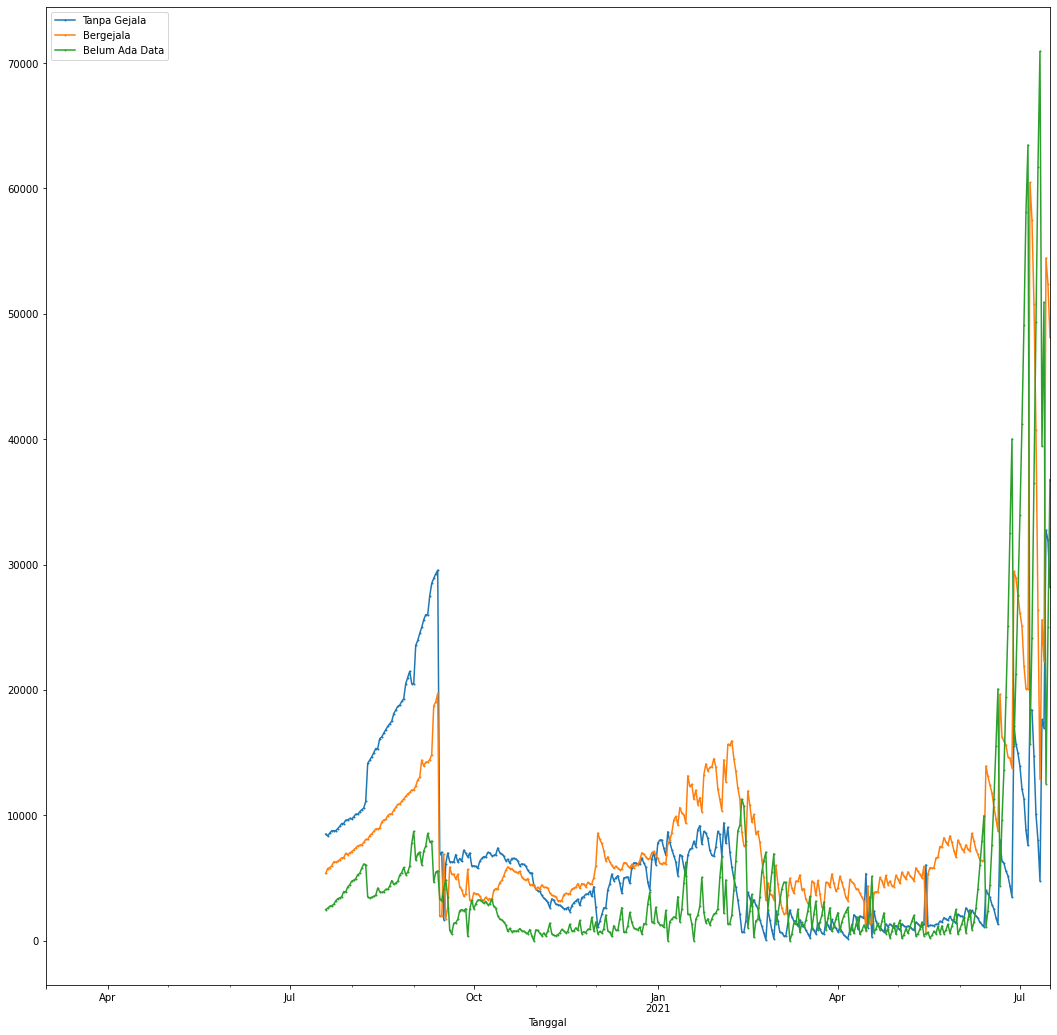

In [51]:
df_DJ.plot(x="Tanggal", y=["Tanpa Gejala","Bergejala","Belum Ada Data"],marker = 'o',figsize=(18, 18),markersize='1')

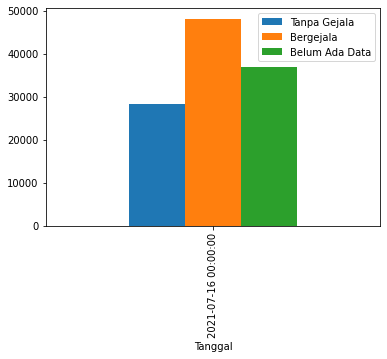

In [52]:
df_DJ.iloc[-1:,:].plot(x="Tanggal", y=["Tanpa Gejala","Bergejala","Belum Ada Data"],kind='bar')

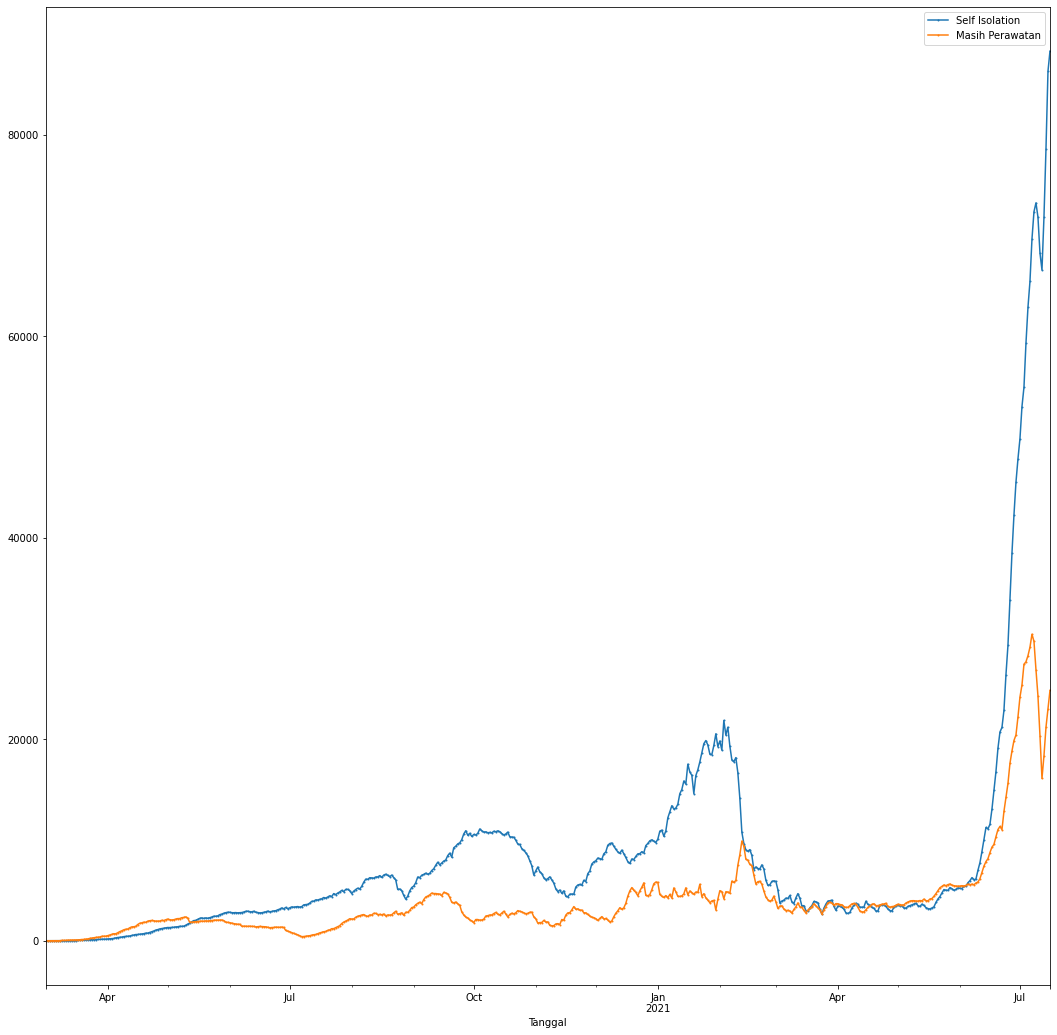

In [53]:
df_DJ.plot(x="Tanggal", y=["Self Isolation", "Masih Perawatan"],marker = 'o',figsize=(18, 18),markersize='1')

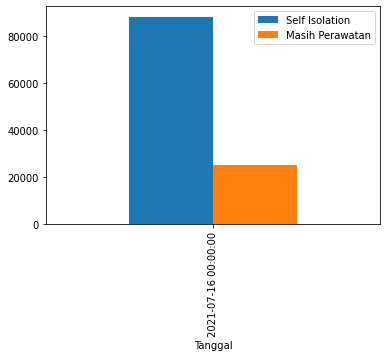

In [54]:
df_DJ.iloc[-1:,:].plot(x="Tanggal", y=["Self Isolation", "Masih Perawatan"],kind='bar')

In [55]:
df_DIJ.tail()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
498,2021-07-12,67355,2119478,380797,2567630,9462,584912,66581,16106,677061,82687,891,34754,4782,40427,67,20475,-1670,-4253,14619,-5923
499,2021-07-13,68219,2139601,407709,2615529,9541,589486,71848,18368,689243,90216,864,20123,26912,47899,79,4574,5267,2262,12182,7529
500,2021-07-14,69210,2157363,443473,2670046,9603,592556,78571,21180,701910,99751,991,17762,35764,54517,62,3070,6723,2812,12667,9535
501,2021-07-15,70192,2176412,480199,2726803,9743,595582,86298,22978,714601,109276,982,19049,36726,56757,140,3026,7727,1798,12691,9525
502,2021-07-16,71397,2204491,504915,2780803,9845,604034,88294,24843,727016,113137,1205,28079,24716,54000,102,8452,1996,1865,12415,3861


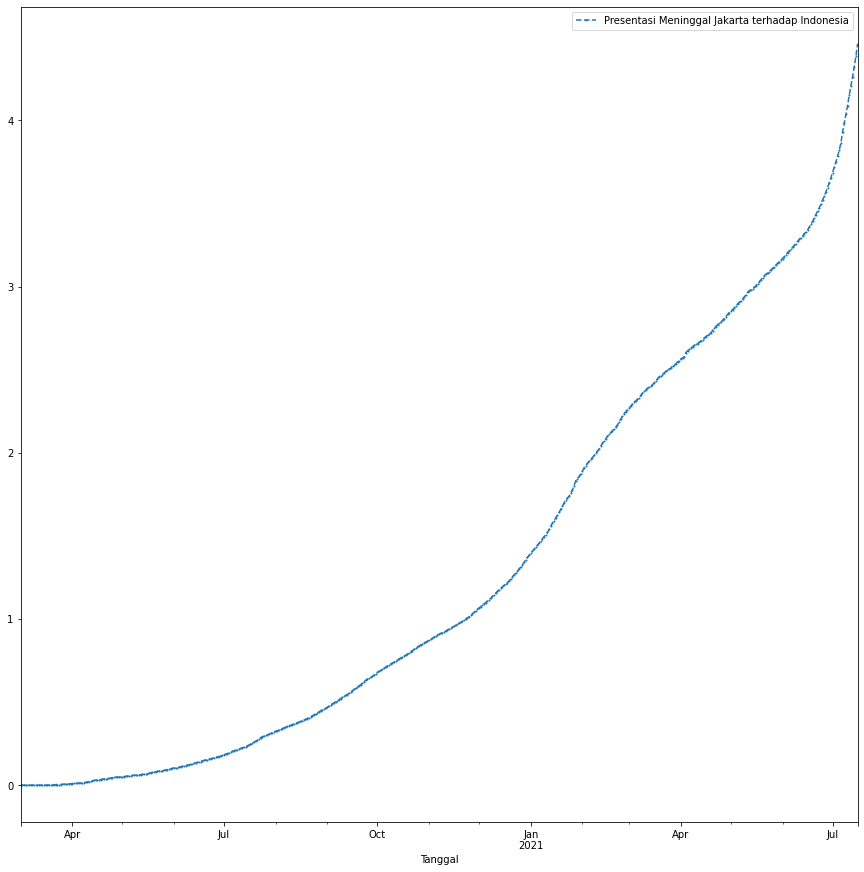

In [56]:
df_DIJ['Presentasi Meninggal Jakarta terhadap Indonesia'] = (df_DIJ['Meninggal (Indonesia)'] / df_DIJ['Meninggal (Jakarta)'].sum()) * 100
df_DIJ.plot(x="Tanggal", y="Presentasi Meninggal Jakarta terhadap Indonesia",marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1')

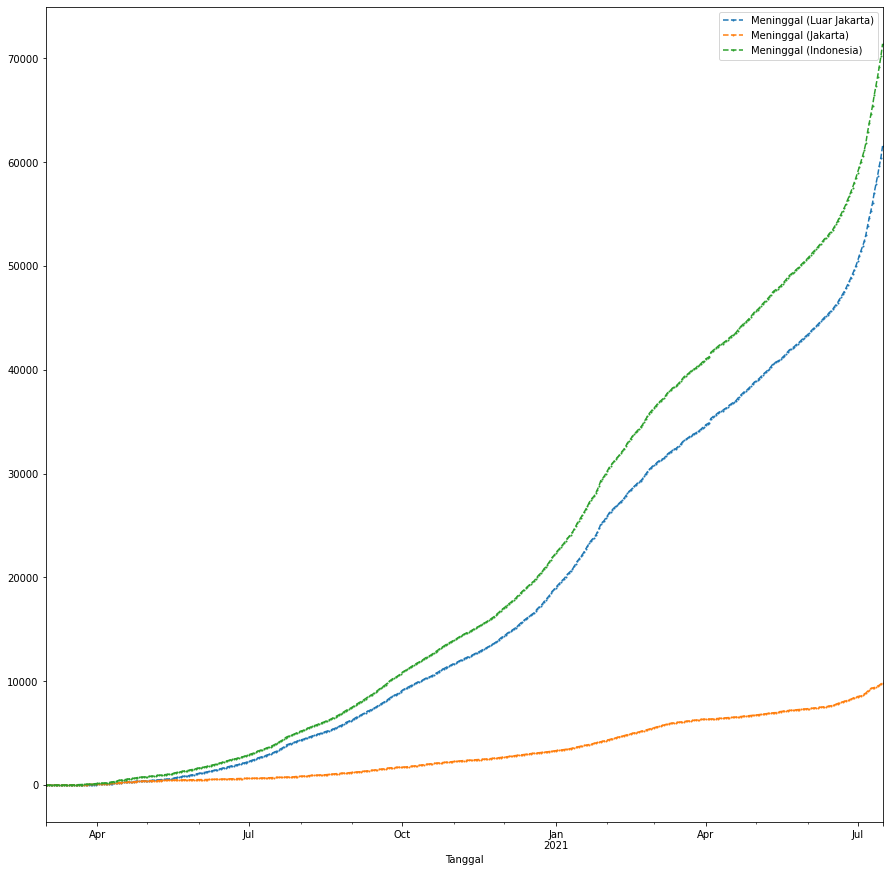

In [57]:
df_DIJ['Meninggal (Luar Jakarta)'] =  (df_DIJ['Meninggal (Indonesia)'] - df_DIJ['Meninggal (Jakarta)'])
df_DIJ.plot(x="Tanggal", y=["Meninggal (Luar Jakarta)","Meninggal (Jakarta)","Meninggal (Indonesia)"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1')

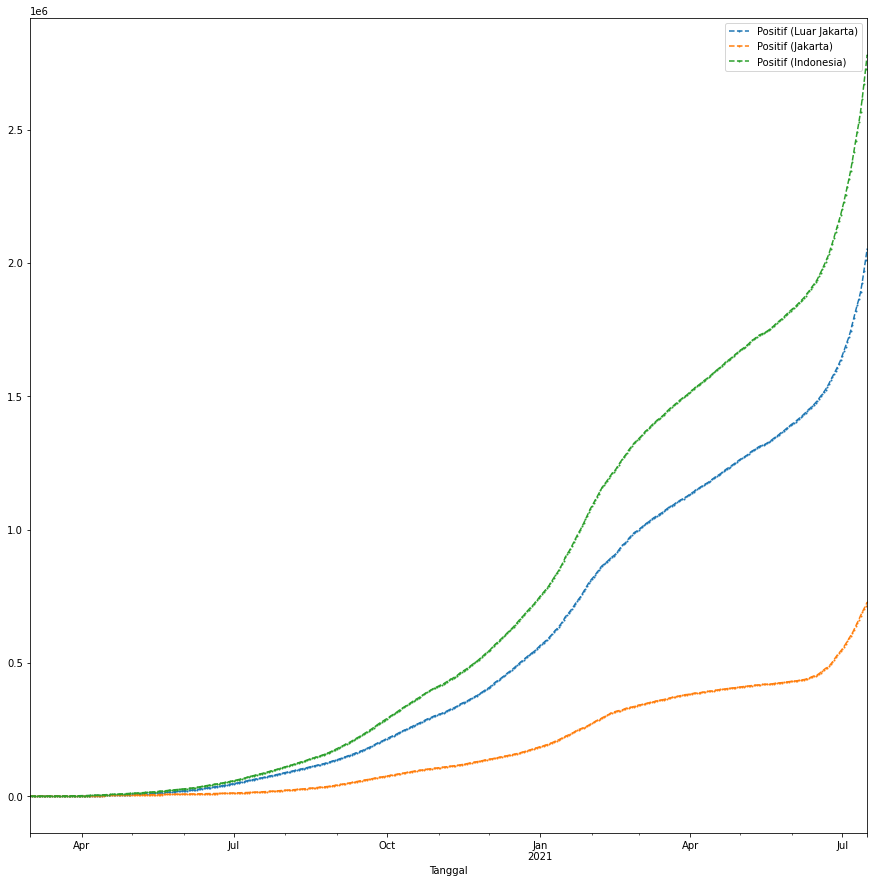

In [58]:
df_DIJ['Positif (Luar Jakarta)'] =  (df_DIJ['Positif (Indonesia)'] - df_DIJ['Positif (Jakarta)'])
df_DIJ.plot(x="Tanggal", y=["Positif (Luar Jakarta)","Positif (Jakarta)","Positif (Indonesia)"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1')

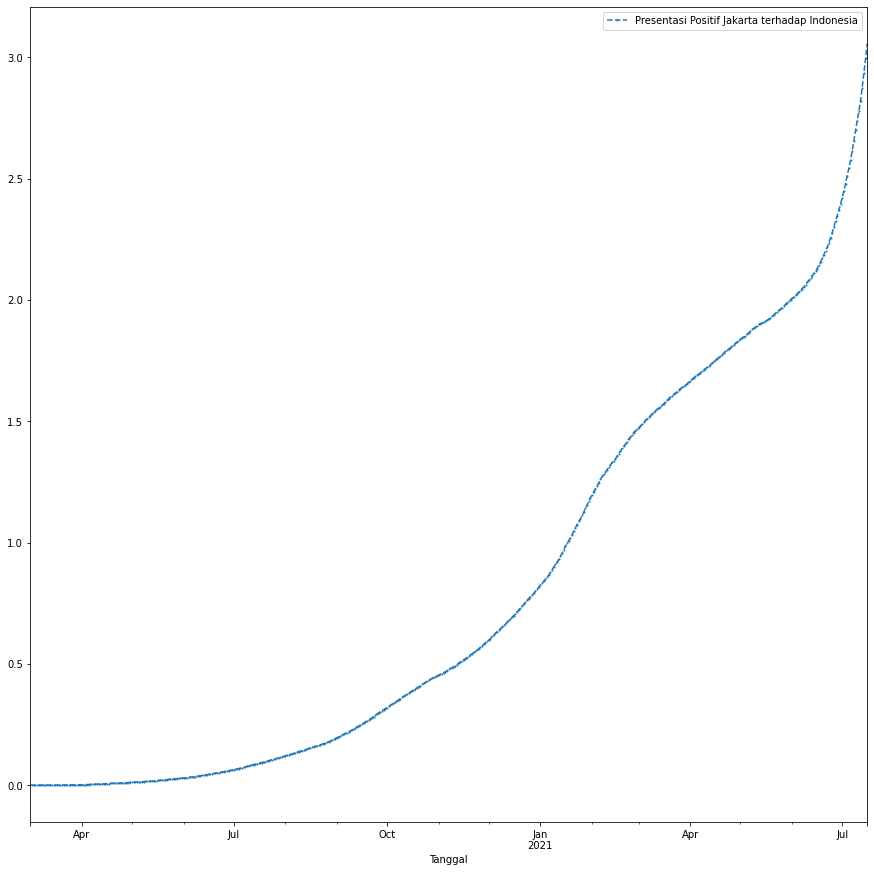

In [59]:
df_DIJ['Presentasi Positif Jakarta terhadap Indonesia'] =  (df_DIJ['Positif (Indonesia)'] / df_DIJ['Positif (Jakarta)'].sum()) * 100
df_DIJ.plot(x="Tanggal", y=["Presentasi Positif Jakarta terhadap Indonesia"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1')

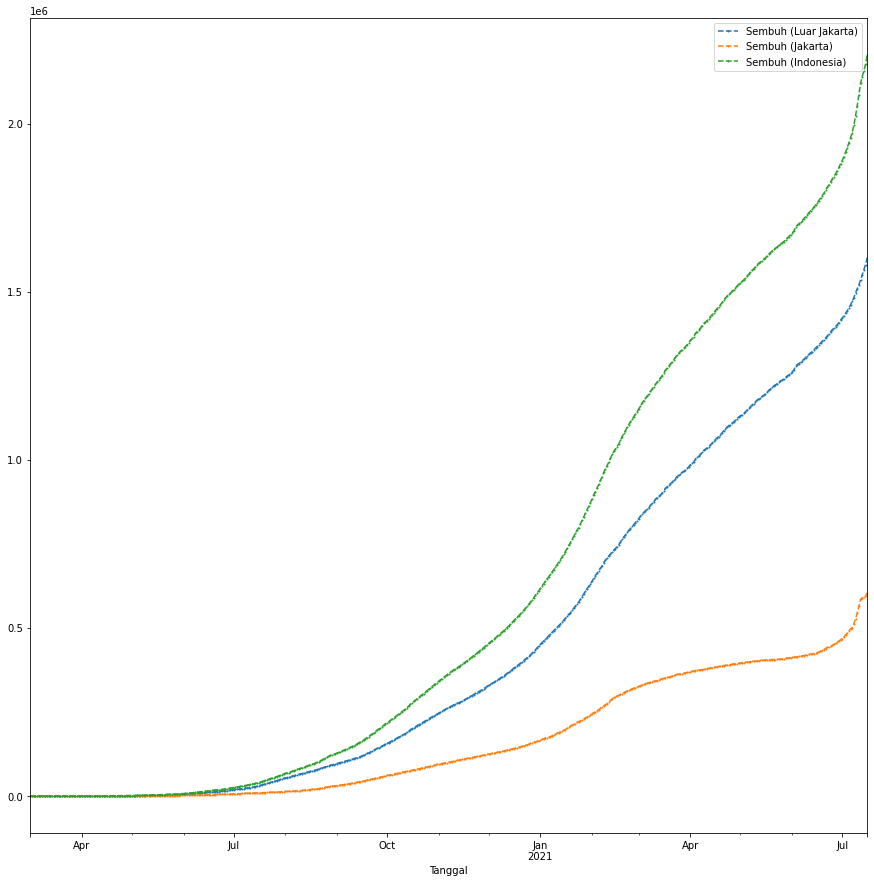

In [60]:
df_DIJ['Sembuh (Luar Jakarta)'] =  (df_DIJ['Sembuh (Indonesia)'] - df_DIJ['Sembuh (Jakarta)'])
df_DIJ.plot(x="Tanggal", y=["Sembuh (Luar Jakarta)","Sembuh (Jakarta)","Sembuh (Indonesia)"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1')

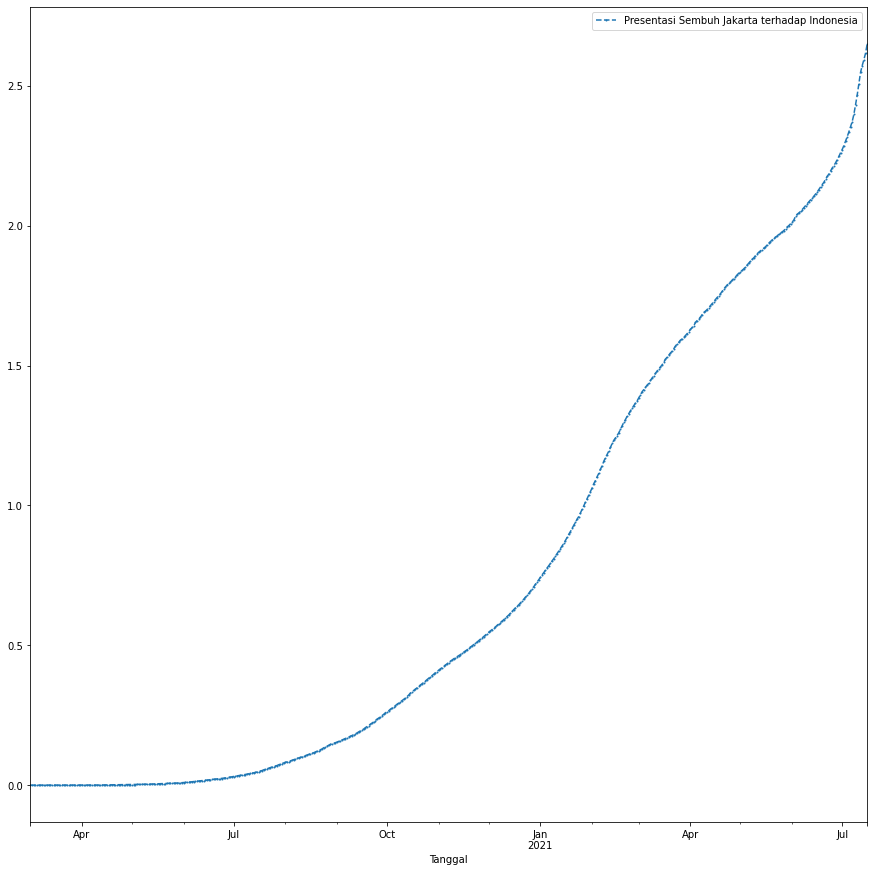

In [61]:
df_DIJ['Presentasi Sembuh Jakarta terhadap Indonesia'] =  (df_DIJ['Sembuh (Indonesia)'] / df_DIJ['Sembuh (Jakarta)'].sum()) * 100
df_DIJ.plot(x="Tanggal", y=["Presentasi Sembuh Jakarta terhadap Indonesia"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


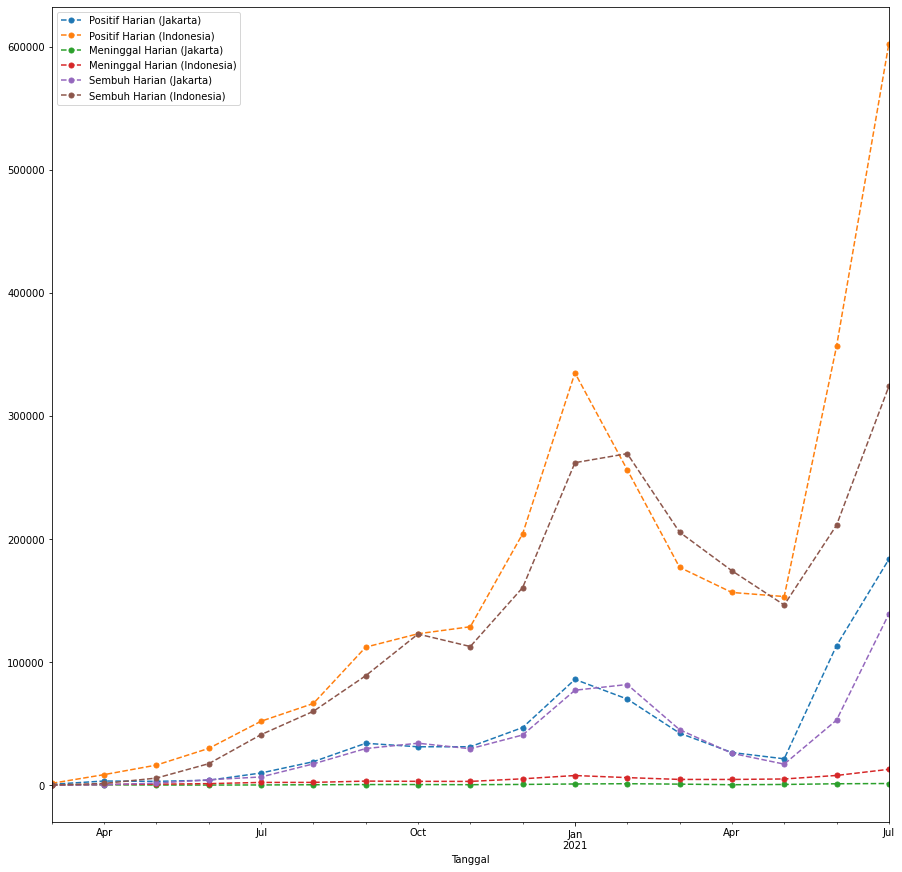

In [62]:
df_DIJ.groupby(df_DIJ['Tanggal'].dt.to_period('m'))["Positif Harian (Jakarta)","Positif Harian (Indonesia)","Meninggal Harian (Jakarta)","Meninggal Harian (Indonesia)","Sembuh Harian (Jakarta)","Sembuh Harian (Indonesia)"].sum().reset_index().plot(x="Tanggal", y=["Positif Harian (Jakarta)","Positif Harian (Indonesia)","Meninggal Harian (Jakarta)","Meninggal Harian (Indonesia)","Sembuh Harian (Jakarta)","Sembuh Harian (Indonesia)"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='5')
plt.show()

In [63]:
df_Suspek = df_Suspek.dropna(how='all')
df_Suspek = df_Suspek.dropna(how='all',axis=1)
df_Suspek

,Tanggal,Total Discarded,Isolasi di Rumah (Discarded),Meninggal (Discarded),Selesai Isolasi (Discarded),Total Kontak Erat,Isolasi di RS (Kontak Erat),Isolasi di Rumah (Kontak Erat),Selesai Isolasi (Kontak Erat),Total Pelaku Perjalanan,Isolasi di RS (Pelaku Perjalanan),Isolasi di Rumah (Pelaku Perjalanan),Selesai Isolasi (Pelaku Perjalanan),Total Probable,Isolasi di RS (Probable),Isolasi di Rumah (Probable),Meninggal (Probable),Selesai Isolasi (Probable),Total Suspek,Isolasi di RS (Suspek),Isolasi di Rumah (Suspek),Meninggal (Suspek),Selesai Isolasi (Suspek),GRAND TOTAL
0,2020-07-17,5712.0,NaN,NaN,5712.0,78725.0,NaN,5191.0,73534.0,1794.0,NaN,41.0,1753.0,42.0,1.0,NaN,4.0,37.0,51507.0,981.0,504.0,2194.0,47828.0,137780.0
1,2020-07-18,5713.0,NaN,NaN,5713.0,80382.0,NaN,6531.0,73851.0,1803.0,NaN,45.0,1758.0,42.0,NaN,NaN,4.0,38.0,52081.0,780.0,584.0,2194.0,48523.0,140021.0
2,2020-07-19,5713.0,NaN,NaN,5713.0,81327.0,NaN,7372.0,73955.0,1803.0,NaN,45.0,1758.0,42.0,NaN,NaN,4.0,38.0,52586.0,1136.0,610.0,2194.0,48646.0,141471.0
3,2020-07-20,5713.0,NaN,NaN,5713.0,81739.0,NaN,5547.0,76192.0,1809.0,NaN,36.0,1773.0,42.0,NaN,NaN,4.0,38.0,52714.0,1067.0,602.0,2194.0,48851.0,142017.0
4,2020-07-21,5643.0,NaN,NaN,5643.0,82860.0,NaN,5934.0,76926.0,1824.0,NaN,46.0,1778.0,42.0,NaN,NaN,4.0,38.0,52957.0,1158.0,725.0,2194.0,48880.0,143326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-07-13,21076.0,NaN,1.0,21075.0,1659466.0,NaN,44458.0,1615008.0,103499.0,NaN,21396.0,82103.0,22660.0,415.0,NaN,12502.0,9743.0,1365557.0,49.0,107592.0,2311.0,1255605.0,3172258.0
362,2021-07-14,21089.0,NaN,1.0,21088.0,1661088.0,NaN,41023.0,1620065.0,106530.0,NaN,23472.0,83058.0,22834.0,383.0,NaN,12656.0,9795.0,1387780.0,48.0,123662.0,2311.0,1261759.0,3199321.0
363,2021-07-15,21176.0,NaN,1.0,21175.0,1664853.0,NaN,37159.0,1627694.0,111246.0,NaN,27318.0,83928.0,23016.0,294.0,NaN,12812.0,9910.0,1414376.0,53.0,140982.0,2311.0,1271030.0,3234667.0
364,2021-07-16,21255.0,NaN,1.0,21254.0,1668802.0,NaN,31431.0,1637371.0,114914.0,NaN,29173.0,85741.0,23188.0,198.0,NaN,12973.0,10017.0,1438226.0,45.0,152640.0,2311.0,1283230.0,3266385.0


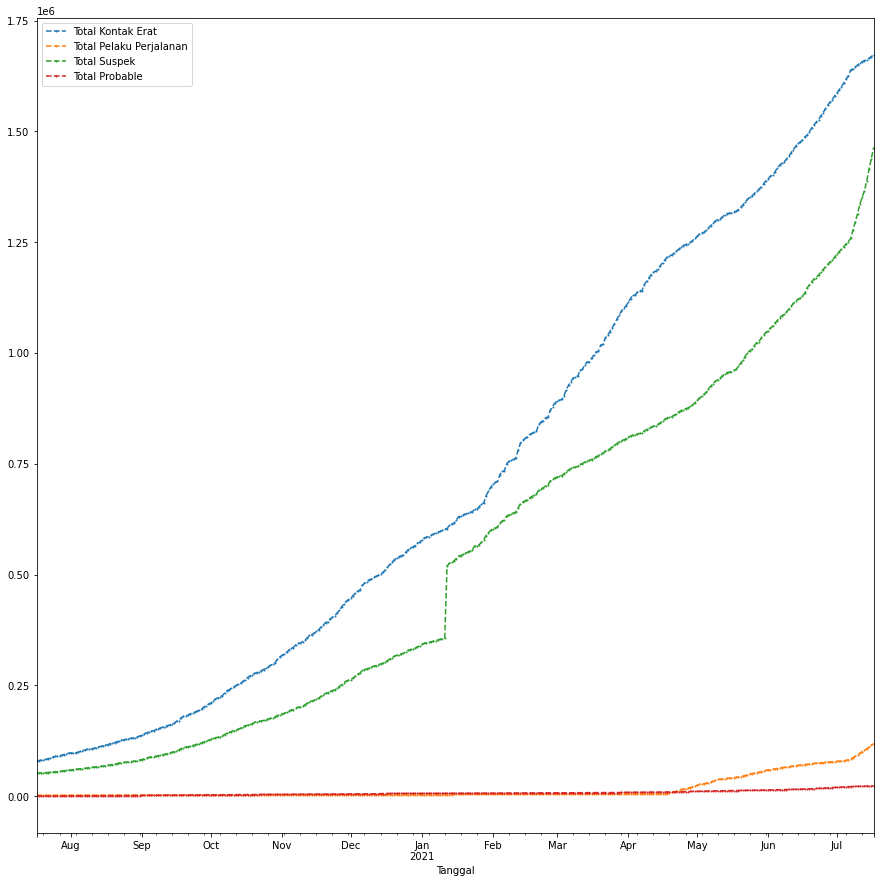

In [64]:
df_Suspek.plot(x="Tanggal", y=["Total Kontak Erat","Total Pelaku Perjalanan","Total Suspek","Total Probable"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1')

In [65]:
df_RDTab = df_RDTab.dropna(how='all').drop('No.',axis=1)
df_RDTab

,Tanggal,Reaktif,Non-Reaktif,Total,Positivity Rate
0,2020-03-27,124.0,10839.0,10963.0,0.011311
1,2020-03-28,149.0,11858.0,12007.0,0.012409
2,2020-03-29,206.0,14808.0,15014.0,0.013721
3,2020-03-30,290.0,17619.0,17909.0,0.016193
4,2020-03-31,307.0,18242.0,18549.0,0.016551
...,...,...,...,...,...
473,2021-07-13,40491.0,690683.0,731174.0,0.055378
474,2021-07-14,40496.0,690700.0,731196.0,0.055383
475,2021-07-15,40516.0,690731.0,731247.0,0.055407
476,2021-07-16,40523.0,690738.0,731261.0,0.055415


In [66]:
df_RDTag = df_RDTag.dropna(how='all').drop('No ',axis=1)
df_RDTag

,Tanggal,EIS Positif,EIS Negatif,EIS Total,NAR Positivity Rate,NAR Positif,NAR Negatif,NAR Total,Excel Positivity Rate,Excel Positif,Excel Negatif,Excel Total,Excel Positivity Rate.1,TotalDKI Tes Harian,TotalDKI Positif Harian,TotalDKI Negatif Harian,TotalDKI Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
0,2021-01-01,76.0,1116.0,1192.0,0.063758,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1192.0,76.0,1116.0,0.063758,1192.0,76.0,1116.0,0.063758
1,2021-01-02,76.0,1116.0,1192.0,0.063758,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1192.0,76.0,1116.0,0.063758
2,2021-01-03,100.0,1699.0,1799.0,0.055586,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,607.0,24.0,583.0,0.039539,1799.0,100.0,1699.0,0.055586
3,2021-01-04,100.0,1699.0,1799.0,0.055586,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1799.0,100.0,1699.0,0.055586
4,2021-01-05,100.0,1699.0,1799.0,0.055586,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1799.0,100.0,1699.0,0.055586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2021-07-13,6427.0,101603.0,108030.0,0.059493,27753.0,467065.0,494818.0,0.056087,42.0,974.0,1016.0,0.041339,7288.0,1080.0,6208.0,0.148189,603864.0,34222.0,569642.0,0.056672
194,2021-07-14,6547.0,102042.0,108589.0,0.060292,28429.0,471503.0,499932.0,0.056866,42.0,974.0,1016.0,0.041339,5673.0,796.0,4877.0,0.140314,609537.0,35018.0,574519.0,0.057450
195,2021-07-15,6640.0,102533.0,109173.0,0.060821,29117.0,476288.0,505405.0,0.057611,42.0,974.0,1016.0,0.041339,6057.0,781.0,5276.0,0.128942,615594.0,35799.0,579795.0,0.058154
196,2021-07-16,6725.0,102821.0,109546.0,0.061390,29942.0,482374.0,512316.0,0.058444,42.0,974.0,1016.0,0.041339,7284.0,910.0,6374.0,0.124931,622878.0,36709.0,586169.0,0.058934


In [67]:
df_RDT_join = df_RDTab.merge(df_RDTag,  how='inner', on='Tanggal')

In [68]:
df_RDT_join

,Tanggal,Reaktif,Non-Reaktif,Total,Positivity Rate,EIS Positif,EIS Negatif,EIS Total,NAR Positivity Rate,NAR Positif,NAR Negatif,NAR Total,Excel Positivity Rate,Excel Positif,Excel Negatif,Excel Total,Excel Positivity Rate.1,TotalDKI Tes Harian,TotalDKI Positif Harian,TotalDKI Negatif Harian,TotalDKI Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
0,2021-01-01,33239.0,618166.0,651405.0,0.051027,76.0,1116.0,1192.0,0.063758,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1192.0,76.0,1116.0,0.063758,1192.0,76.0,1116.0,0.063758
1,2021-01-02,33239.0,618266.0,651505.0,0.051019,76.0,1116.0,1192.0,0.063758,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1192.0,76.0,1116.0,0.063758
2,2021-01-03,33239.0,618366.0,651605.0,0.051011,100.0,1699.0,1799.0,0.055586,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,607.0,24.0,583.0,0.039539,1799.0,100.0,1699.0,0.055586
3,2021-01-04,33239.0,618466.0,651705.0,0.051003,100.0,1699.0,1799.0,0.055586,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1799.0,100.0,1699.0,0.055586
4,2021-01-05,37852.0,675591.0,713443.0,0.053055,100.0,1699.0,1799.0,0.055586,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1799.0,100.0,1699.0,0.055586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2021-07-13,40491.0,690683.0,731174.0,0.055378,6427.0,101603.0,108030.0,0.059493,27753.0,467065.0,494818.0,0.056087,42.0,974.0,1016.0,0.041339,7288.0,1080.0,6208.0,0.148189,603864.0,34222.0,569642.0,0.056672
194,2021-07-14,40496.0,690700.0,731196.0,0.055383,6547.0,102042.0,108589.0,0.060292,28429.0,471503.0,499932.0,0.056866,42.0,974.0,1016.0,0.041339,5673.0,796.0,4877.0,0.140314,609537.0,35018.0,574519.0,0.057450
195,2021-07-15,40516.0,690731.0,731247.0,0.055407,6640.0,102533.0,109173.0,0.060821,29117.0,476288.0,505405.0,0.057611,42.0,974.0,1016.0,0.041339,6057.0,781.0,5276.0,0.128942,615594.0,35799.0,579795.0,0.058154
196,2021-07-16,40523.0,690738.0,731261.0,0.055415,6725.0,102821.0,109546.0,0.061390,29942.0,482374.0,512316.0,0.058444,42.0,974.0,1016.0,0.041339,7284.0,910.0,6374.0,0.124931,622878.0,36709.0,586169.0,0.058934


In [69]:
df_RDT_join['Antibodi Harian'] = df_RDT_join['Reaktif'].diff().iloc[1:]

In [70]:
df_RDT_join['Antibodi Negatif Harian'] = df_RDT_join['Non-Reaktif'].diff().iloc[1:]

In [71]:
df_RDT_join['Total Positif Harian'] = df_RDT_join['Antibodi Harian'] + df_RDT_join['TotalDKI Positif  Harian']

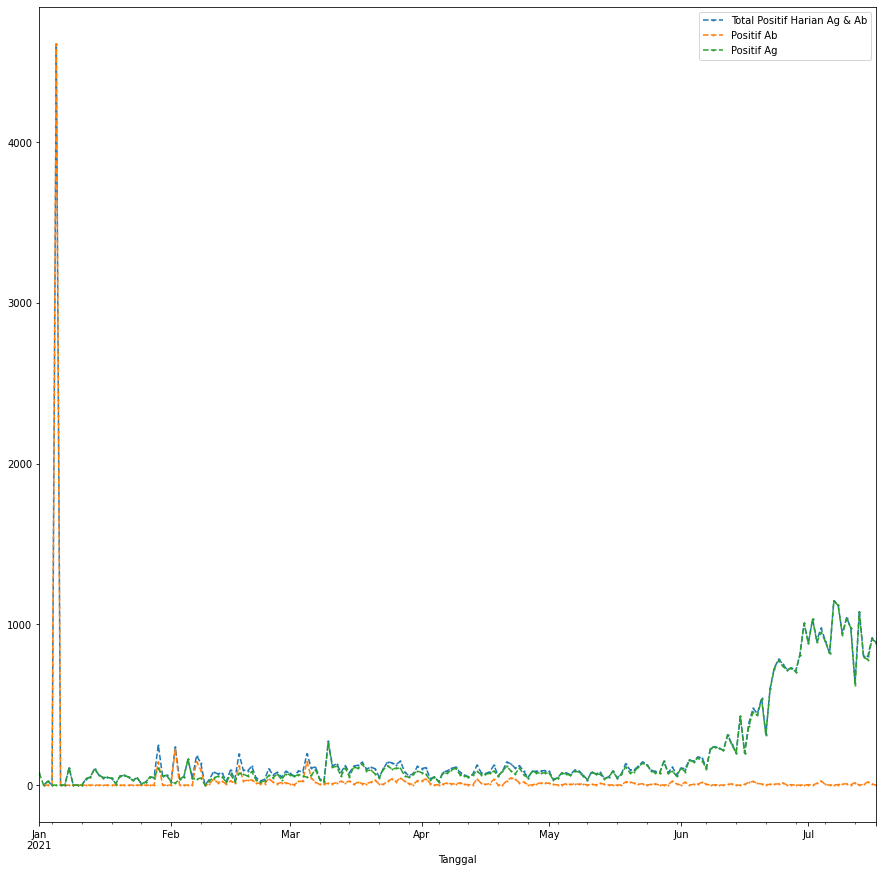

In [72]:
df_RDT_join.plot(x="Tanggal", y=["Total Positif Harian","Antibodi Harian","TotalDKI Positif  Harian"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1',label=['Total Positif Harian Ag & Ab','Positif Ab','Positif Ag'])

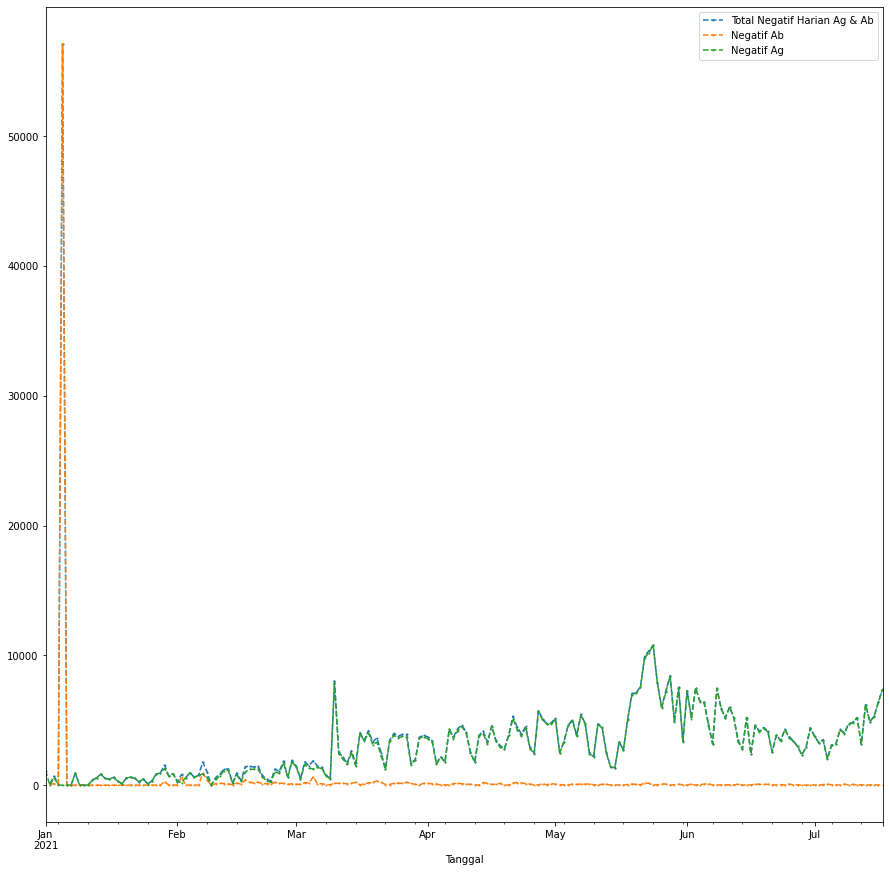

In [73]:
df_RDT_join['Total Negatif Harian'] = df_RDT_join['Antibodi Negatif Harian'] + df_RDT_join['TotalDKI Negatif Harian']
df_RDT_join.plot(x="Tanggal", y=["Total Negatif Harian","Antibodi Negatif Harian","TotalDKI Negatif Harian"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1',label=['Total Negatif Harian Ag & Ab','Negatif Ab','Negatif Ag'])

In [74]:
df_RDT_join = df_RDT_join.merge(df_DJ,  how='inner', on='Tanggal')

In [75]:
df_RDT_join.columns

Index(['Tanggal', 'Reaktif', 'Non-Reaktif', 'Total', 'Positivity Rate',
       'EIS Positif', 'EIS Negatif', 'EIS Total', 'NAR Positivity Rate',
       'NAR Positif', 'NAR Negatif', 'NAR Total', 'Excel Positivity Rate',
       'Excel Positif', 'Excel Negatif', 'Excel Total',
       'Excel Positivity Rate.1', 'TotalDKI Tes Harian',
       'TotalDKI Positif  Harian', 'TotalDKI Negatif Harian',
       'TotalDKI Positivity Rate Harian', 'Total Kumulatif',
       'Positif Kumulatif', 'Negatif Kumulatif', 'Positivity Rate Kumulatif',
       'Antibodi Harian', 'Antibodi Negatif Harian', 'Total Positif Harian',
       'Total Negatif Harian', 'Jam', 'Tanggal Jam', 'Total Pasien', 'Sembuh',
       'Meninggal', 'Self Isolation', 'Masih Perawatan', 'Menunggu Hasil',
       'Tenaga Kesehatan Terinfeksi', 'Positif Harian', 'Positif Aktif',
       'Sembuh Harian', 'Tanpa Gejala', 'Bergejala', 'Belum Ada Data'],
      dtype='object')

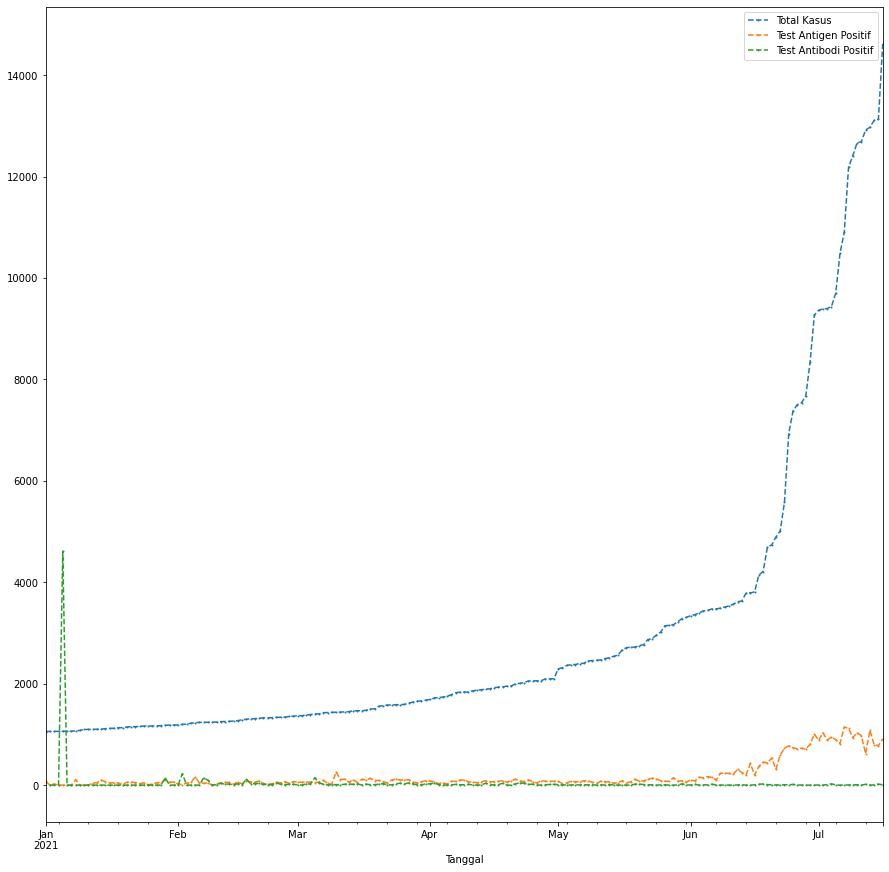

In [76]:
df_RDT_join.plot(x="Tanggal", y=["Positif Harian","TotalDKI Positif  Harian","Antibodi Harian"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1',label=['Total Kasus','Test Antigen Positif','Test Antibodi Positif'])

In [127]:
df_V = df_V.dropna(how='all')
df_V['Tanggal Pendataan'] = df_V.iloc[:,0]
df_V['DKI | Total Indonesia | Vaksinasi 2'] = df_V['DKI | Total Indonesia | Vaksinasi 2'].astype(float)

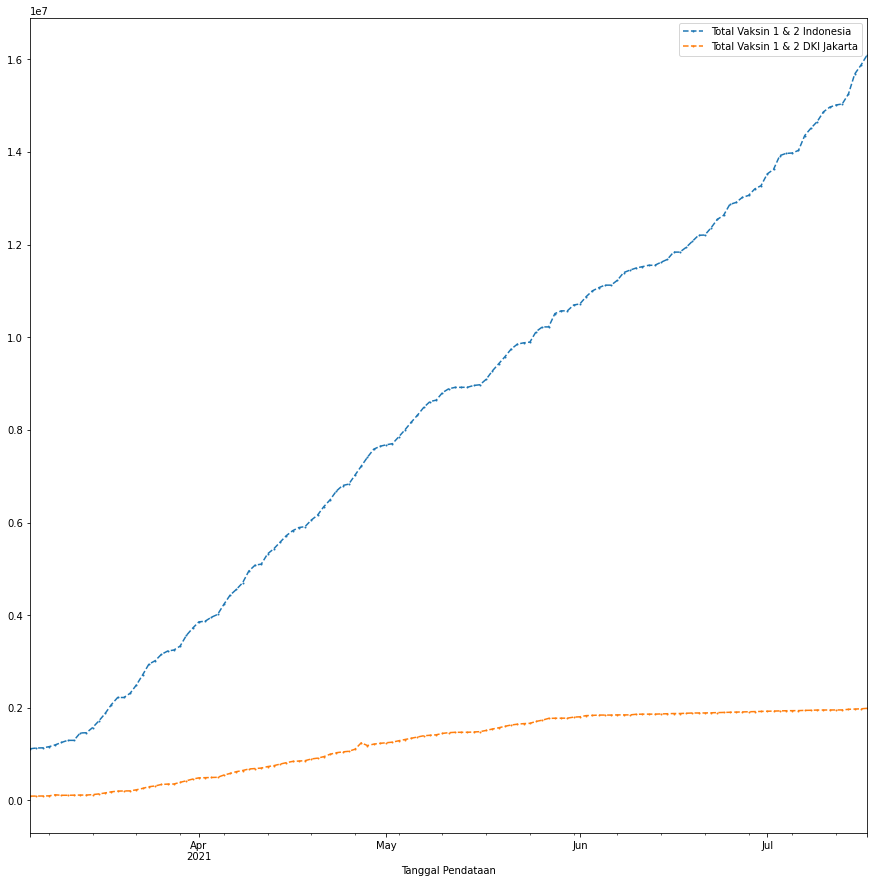

In [130]:
df_V.plot(x='Tanggal Pendataan', y=['DKI | Total Indonesia | Vaksinasi 2','DKI | Total DKI Jakarta | Vaksinasi 2'],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1',label=['Total Vaksin 1 & 2 Indonesia','Total Vaksin 1 & 2 DKI Jakarta'])

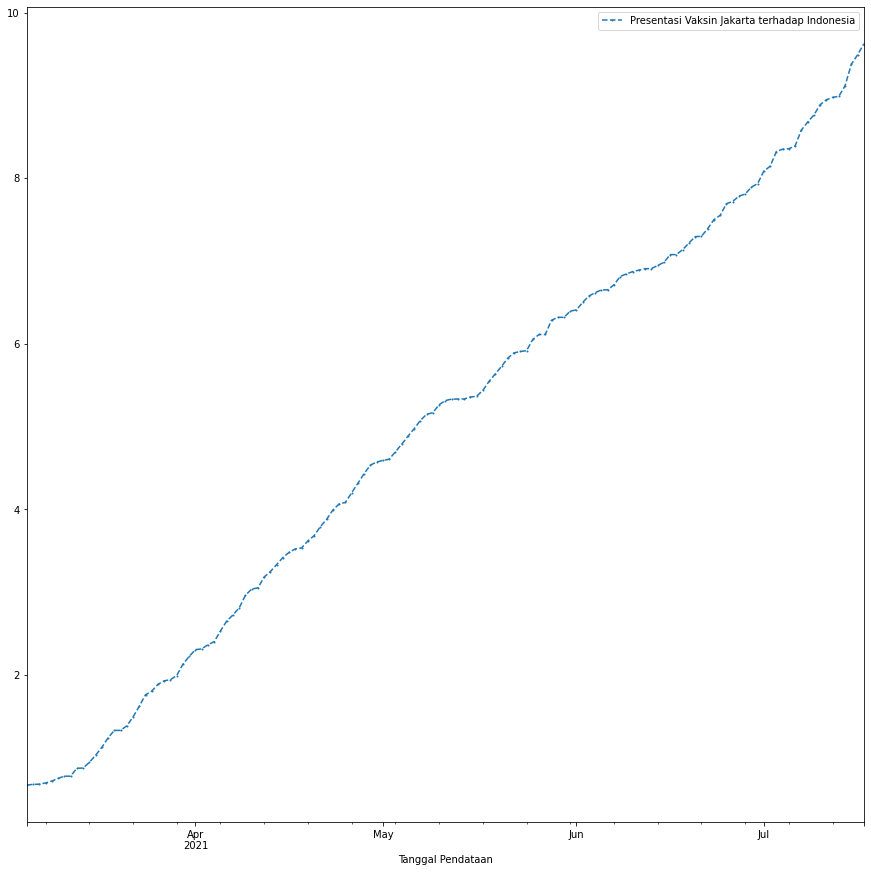

In [131]:
df_V['Presentasi Vaksin Jakarta terhadap Indonesia'] =  (df_V['DKI | Total Indonesia | Vaksinasi 2'] / df_V['DKI | Total DKI Jakarta | Vaksinasi 2'].sum()) * 100
df_V.plot(x="Tanggal Pendataan", y=["Presentasi Vaksin Jakarta terhadap Indonesia"],marker = 'o',figsize=(15, 15),linestyle='dashed',markersize='1')